# Explorando datos de stack overflow

In [ ]:
# Quisiera saber que tecnologia hay mas preguntas
# Y que preguntas tienen mas respuestas y visualizaciones.

In [11]:
import requests
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Accedo a la API  de Stack Overflow  - questions

In [2]:
url ='https://api.stackexchange.com/2.3/questions?order=desc&sort=activity&site=stackoverflow'
#url = 'https://api.stackexchange.com/2.3/questions?order=desc&sort=activity&tagged=python&site=stackoverflow'

response = requests.get(url)

### Obtengo un obj json, pero solo me interesan los 'items'

In [3]:
q = response.json()['items']
print(q)

[{'tags': ['sql', 'select', 'sas', 'enterprise-guide'], 'owner': {'account_id': 21391058, 'reputation': 145, 'user_id': 15755111, 'user_type': 'registered', 'profile_image': 'https://www.gravatar.com/avatar/3983bc229f87d61c454511fcb4d0bd67?s=256&d=identicon&r=PG&f=1', 'display_name': 'sra', 'link': 'https://stackoverflow.com/users/15755111/sra'}, 'is_answered': False, 'view_count': 5, 'answer_count': 0, 'score': 0, 'last_activity_date': 1680139431, 'creation_date': 1680138351, 'last_edit_date': 1680139431, 'question_id': 75883344, 'content_license': 'CC BY-SA 4.0', 'link': 'https://stackoverflow.com/questions/75883344/select-columns-from-values-of-other-sql-statement', 'title': 'Select Columns From Values of other sql statement'}, {'tags': ['java', 'visual-studio-code'], 'owner': {'account_id': 28163530, 'reputation': 1, 'user_id': 21523021, 'user_type': 'registered', 'profile_image': 'https://lh3.googleusercontent.com/a/AGNmyxalQimH6NQib_IY4TJYgNvai-fq23Wn-3gWyVg=k-s256', 'display_nam

### Recorro el json y me guardo los datos que me interesan en arrays

In [4]:
titulo = []
link = []
temas = []
vistas = []
respuestas = []
puntaje = []
fecha = []

for question in q:
    #print(question['title'])
        
    titulo.append(question['title'])
    link.append(question['link'])
    temas.append(question['tags'])
    vistas.append(question['view_count'])
    respuestas.append(question['answer_count'])
    puntaje.append(question['score'])

    datetime_obj=datetime.fromtimestamp(question['creation_date'])
    fecha.append(datetime_obj)
    
    


In [5]:
# verifico q mis arrays tengan el mismo tamaño
len(titulo),len(link),len(temas),len(vistas) ,len(respuestas) ,len(puntaje) 

(30, 30, 30, 30, 30, 30)

In [6]:
#armo el dataframe
#df = pd.DataFrame({'Fecha': fecha, 'Temas': temas,'Vistas': vistas,'Respuestas': respuestas,'Puntaje': puntaje })

#armo el dataframe2
df = pd.DataFrame({'Titulo': titulo, 'Link': link, 'Fecha': fecha, 'Temas': temas,'Vistas': vistas,'Respuestas': respuestas,'Puntaje': puntaje })

df



,Titulo,Link,Fecha,Temas,Vistas,Respuestas,Puntaje
0,Select Columns From Values of other sql statement,https://stackoverflow.com/questions/75883344/s...,2023-03-29 22:05:51,"[sql, select, sas, enterprise-guide]",5,0,0
1,"When I code java in visual studio code, I see ...",https://stackoverflow.com/questions/75883390/w...,2023-03-29 22:23:36,"[java, visual-studio-code]",2,0,0
2,Android Studio does not start emulator,https://stackoverflow.com/questions/75883389/a...,2023-03-29 22:23:19,"[android, android-studio]",3,0,0
3,Duplicate rows based on condition pandas,https://stackoverflow.com/questions/75883051/d...,2023-03-29 20:47:59,"[python, pandas, dataframe, if-statement, dupl...",18,1,0
4,"Rust hashmap of vectors, minimal lookup operat...",https://stackoverflow.com/questions/75883214/r...,2023-03-29 21:29:26,"[rust, hashtable]",13,0,0
5,Linking Google forms to Photoshop,https://stackoverflow.com/questions/75883387/l...,2023-03-29 22:22:56,"[web, google-forms, photoshop, id-card]",2,0,0
6,How to use Combine in SwiftUI views without Ob...,https://stackoverflow.com/questions/75883386/h...,2023-03-29 22:22:47,"[swift, swiftui, combine]",3,0,0
7,Web Inspector text and html text using beautif...,https://stackoverflow.com/questions/75883385/w...,2023-03-29 22:22:42,"[javascript, python, html, beautifulsoup]",3,0,0
8,Can I tell which character was clicked on on a...,https://stackoverflow.com/questions/5686094/ca...,2011-04-16 08:14:34,"[.net, winforms, .net-4.0, label]",209,5,0
9,Error implementing Rails mail_form gem &quot;N...,https://stackoverflow.com/questions/75883383/e...,2023-03-29 22:21:56,"[ruby-on-rails, ruby, rubygems, mail-form]",2,0,0


In [7]:
# Extract the relevant columns
temas = df['Temas']
vistas = df['Vistas']
respuestas = df['Respuestas']
puntaje = df['Puntaje']

In [8]:
#Reviso como son los Temas
df['Temas']

0                  [sql, select, sas, enterprise-guide]
1                            [java, visual-studio-code]
2                             [android, android-studio]
3     [python, pandas, dataframe, if-statement, dupl...
4                                     [rust, hashtable]
5               [web, google-forms, photoshop, id-card]
6                             [swift, swiftui, combine]
7             [javascript, python, html, beautifulsoup]
8                     [.net, winforms, .net-4.0, label]
9            [ruby-on-rails, ruby, rubygems, mail-form]
10                                             [paypal]
11                          [anaconda, conda, graphviz]
12                           [docker, dockerfile, rhel]
13                      [google-sheets, search, filter]
14                         [javascript, arrays, filter]
15                                                  [c]
16          [sql, sql-server, combinations, powerquery]
17           [javascript, html, css, button, ind

In [9]:

# Create a dictionary with frequency count of each word in the temas list
word_freq = {}
for temas in df['Temas']:
    #print(temas)
    #temas_str = ' '.join(temas)
    #print(temas_str)
    #splited = temas.split(' ')
    #print(splited)
    for word in temas:
        #print(word)
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1

# Create a new dataframe with word and its frequency
tag_df = pd.DataFrame(list(word_freq.items()), columns=['Tag', 'Frequency'])

# Sort the dataframe by frequency in descending order
tag_df = tag_df.sort_values(by='Frequency', ascending=False)

print(tag_df)


              Tag  Frequency
22     javascript          4
8          python          4
23           html          4
48            css          3
42         filter          2
..            ...        ...
29  ruby-on-rails          1
28          label          1
27       .net-4.0          1
26       winforms          1
82    calendarkit          1

[83 rows x 2 columns]


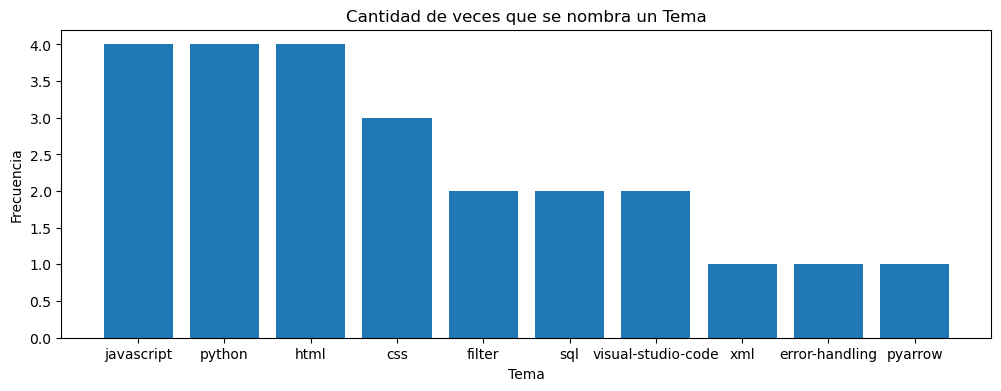

In [12]:
# graficar los Tags que aparecen mas de una vez 

# filter for words with more than 1 frequency
tag_df_filtered = tag_df[tag_df['Frequency'] > 1]

# filter for the top 10 words
tag_df_filtered = tag_df.head(10)

tags = tag_df_filtered['Tag']
freq = tag_df_filtered['Frequency']

fig, ax = plt.subplots(figsize=(12,4))  
ax.bar(tags, freq)

#ax.plot(tags, freq, color="red")
ax.set_title('Cantidad de veces que se nombra un Tema')

ax.set_xlabel('Tema')
ax.set_ylabel('Frecuencia')


plt.show()

#Algunos Insights:
Los temas tuve que separarlos en palabras, para poder identificar la incidencia de cada uno.

Como los scores estan asociados a una convinacion de temas, la mayoría de los temas tienen vistas, respuestas y puntajes muy bajos. Esto puede indicar que las publicaciones no reciben suficiente atención y es posible que deban optimizarse para una mejor visibilidad. Por ejemplo, agregar títulos, etiquetas o palabras clave más descriptivos podría ayudar.

La publicación con más vistas, respuestas y puntuación está relacionada con "github" y "github-flavored-markdown". Esto sugiere que los temas relacionados con herramientas y plataformas populares tienden a generar más participación.

Algunos temas tienen puntajes negativos, lo que significa que recibieron más votos negativos que positivos. Esto puede indicar que el contenido no es valioso o útil para la comunidad. Podría ser beneficioso analizar estas publicaciones para identificar posibles problemas y mejorar el contenido.

Hay algunos temas que tienen vistas altas pero respuestas y puntajes bajos. Esto podría indicar que el contenido es interesante para los lectores, pero no es lo suficientemente atractivo como para generar debate o comentarios positivos. Podría ser útil explorar formas de hacer que el contenido sea más interactivo, como agregar ejemplos, preguntas o desafíos.

Hay algunos temas que son muy específicos, como "pycharm" y "comparación de ms-word", que pueden tener una audiencia limitada. Puede ser útil considerar temas más amplios que atraigan a una audiencia más amplia, sin dejar de brindar valor a la comunidad específica.

Según los datos, parece que los temas relacionados con el desarrollo web y los lenguajes de programación son más populares que otros temas. Puede ser útil centrarse en estas áreas al crear contenido, pero también considere explorar otras áreas de interés para la comunidad.